<a href="https://colab.research.google.com/github/tawfeeq6719/colour-identification/blob/colour-identification-code/Colouridentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **TOPIC : COLOUR IDENTIFICATION IN IMAGE**

#  NAME: TAWFEEQ

#  BATCH: MAY 23

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


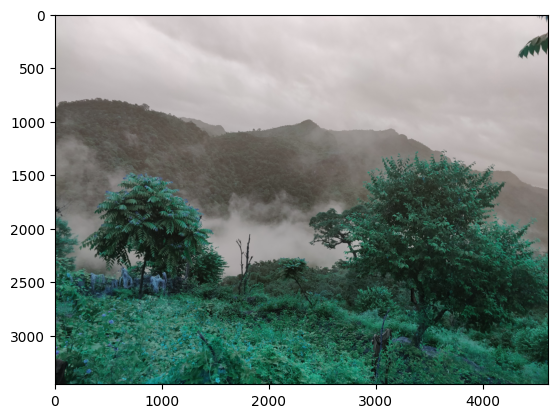

In [2]:
image = cv2.imread('/sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

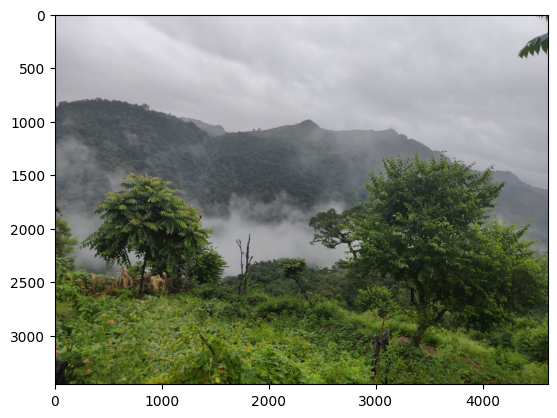

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

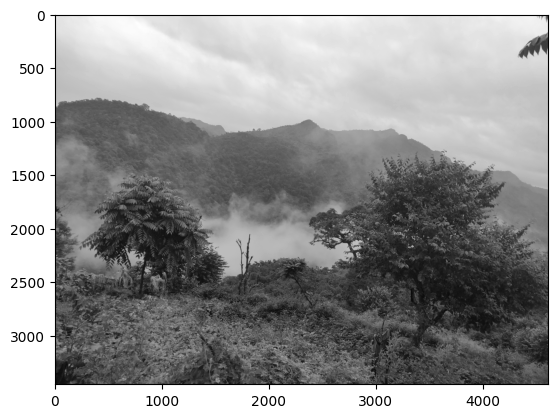

In [51]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

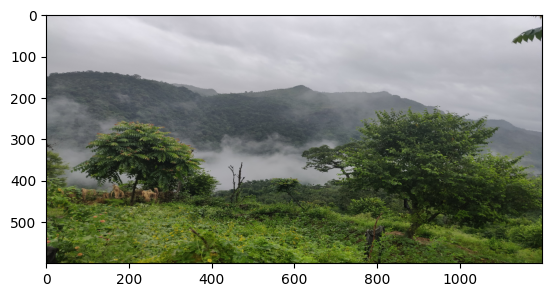

In [4]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([179.74065875, 180.31452194, 186.76236832]),
 array([55.55266527, 68.54192854, 34.57891061]),
 array([84.22512251, 91.06343968, 92.31823182]),
 array([206.76034888, 206.45446035, 213.92752928]),
 array([110.54153944, 125.94656489,  57.18632316]),
 array([121.10717076, 125.66785311, 125.59670978]),
 array([30.7292637 , 39.253102  , 21.43364027]),
 array([79.53015515, 97.38793794, 38.69411465])]

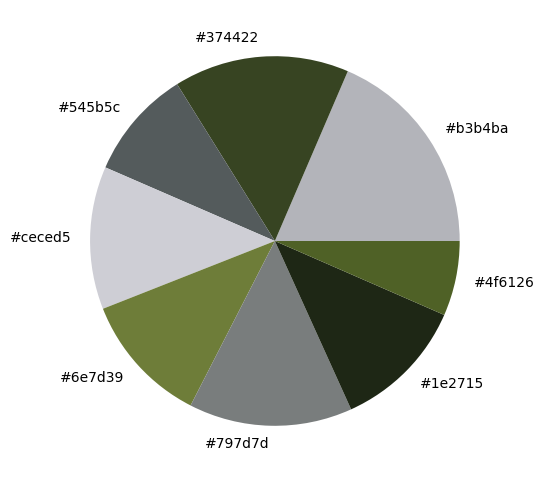

In [8]:
get_colors(get_image('/sample_image.jpg'),8, True)

**RESULT :**

FROM THE THE GIVEN INPUT IMAGE WE HAVE IDENTIFIED THE TOP 8 COLOURS THAT HAVE BEEN PART OF THE INPUT IMAGE AND THOSE 8 COLOURS HAVE BEEN PRESENTED IN THE FORM OF PIE CHART AND ALSO THE 8 ARE COLOURS LABELLED WITH HEX COLOUR CODE .